In [2]:
#Instalación (solo una vez en Colab)
!pip install pandas matplotlib seaborn scikit-learn

In [3]:
#Función para graficar frontera de decisión
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", edgecolor="k")
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

In [4]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Cargar correctamente el archivo con separador ';'
df = pd.read_csv("dataset.csv", sep=";")

# Verifica que ahora sí se vean las columnas por separado
print(df.head())
print(df.columns)

    col1   col2   col3   col4   col5   col6   col7   col8   col9  col10  \
0  38.29  38.29  38.29  38.29  38.29  38.29  38.66  38.66  38.66  38.66   
1  39.03  38.66  39.03  39.03  39.03  39.03  39.03  39.03  39.03  39.03   
2  39.41  39.41  39.41  39.41  39.41  39.41  39.78  39.41  39.78  39.78   
3  39.78  39.78  39.78  39.78  40.15  40.15  40.15  40.15  40.15  40.15   
4  40.52  40.52  40.52  40.52  40.52  40.52  40.52  40.52  40.52  40.52   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'target'],
      dtype='object')


In [5]:
# Paso 1: Separar las características (X) de la variable objetivo (y)
# 'X' contiene todas las columnas menos la etiqueta de clase 'target'
# 'y' contiene solo la columna 'target', que indica si es agua (+1) o aceite (-1)
X = df.drop('target', axis=1)
y = df['target']

# Paso 2: Escalar los datos con StandardScaler
# Esto normaliza las características numéricas para que tengan media 0 y desviación estándar 1
# Es importante para algoritmos como SVM y Regresión Logística
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Aplicamos el escalado a las características


In [6]:
from sklearn.decomposition import PCA

# Reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [7]:
# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)


In [8]:
# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos supervisados
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Métricas de evaluación
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

📊 Árbol de Decisión

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       394
           1       0.99      1.00      1.00       501

    accuracy                           1.00       895
   macro avg       1.00      1.00      1.00       895
weighted avg       1.00      1.00      1.00       895



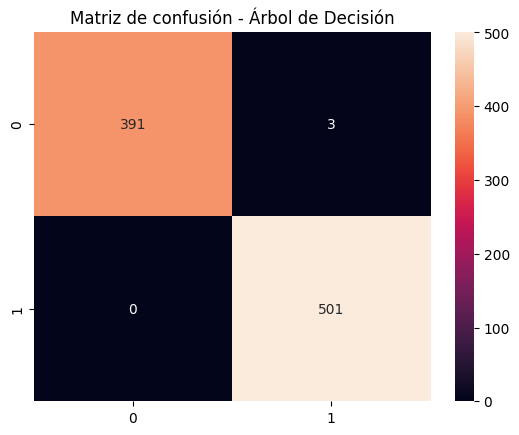

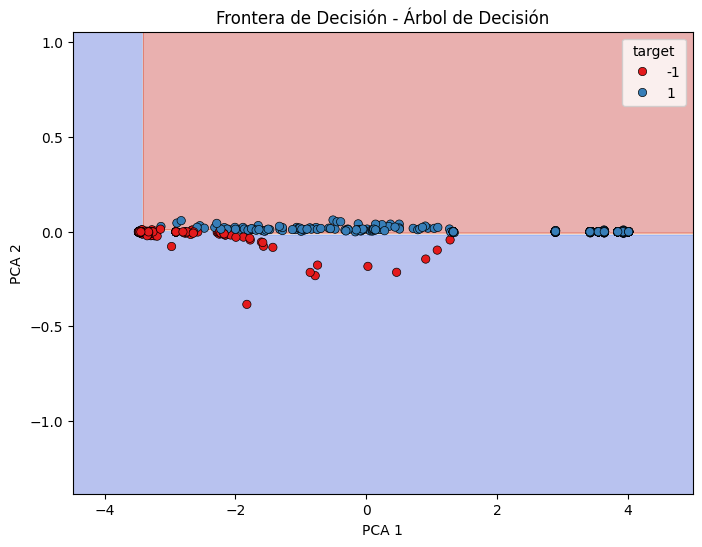

In [9]:
 #Modelo 1: Árbol de Decisión
 from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_pca, y_train_pca)
y_pred_tree = tree.predict(X_test_pca)

print("📊 Árbol de Decisión\n")
print(classification_report(y_test_pca, y_pred_tree))
sns.heatmap(confusion_matrix(y_test_pca, y_pred_tree), annot=True, fmt="d")
plt.title("Matriz de confusión - Árbol de Decisión")
plt.show()

plot_decision_boundary(tree, X_test_pca, y_test_pca, "Frontera de Decisión - Árbol de Decisión")


📊 SVM (kernel RBF)

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       394
           1       0.97      0.98      0.97       501

    accuracy                           0.97       895
   macro avg       0.97      0.97      0.97       895
weighted avg       0.97      0.97      0.97       895



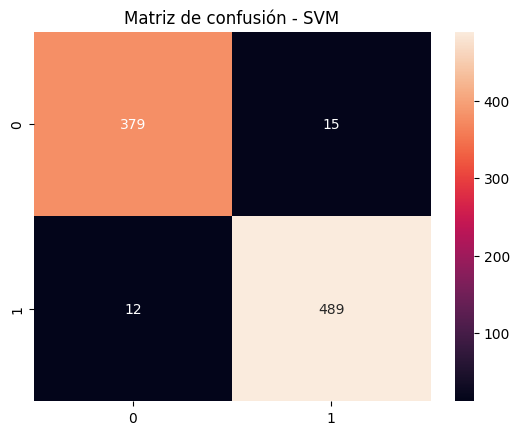

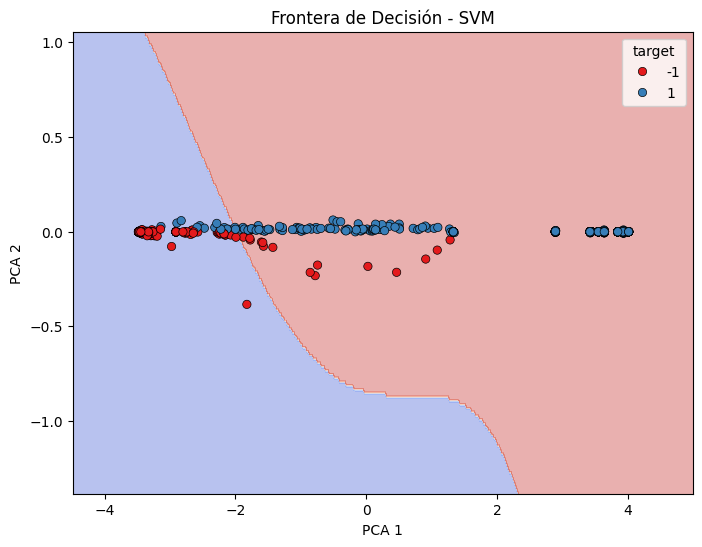

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train_pca, y_train_pca)
y_pred_svm = svm.predict(X_test_pca)

print("📊 SVM (kernel RBF)\n")
print(classification_report(y_test_pca, y_pred_svm))
sns.heatmap(confusion_matrix(y_test_pca, y_pred_svm), annot=True, fmt="d")
plt.title("Matriz de confusión - SVM")
plt.show()

plot_decision_boundary(svm, X_test_pca, y_test_pca, "Frontera de Decisión - SVM")


📊 Regresión Logística

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97       394
           1       0.98      0.97      0.97       501

    accuracy                           0.97       895
   macro avg       0.97      0.97      0.97       895
weighted avg       0.97      0.97      0.97       895



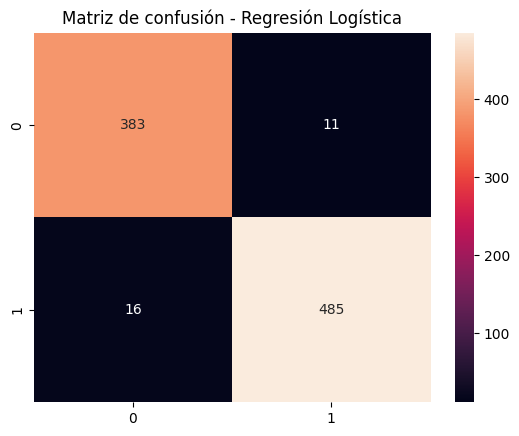

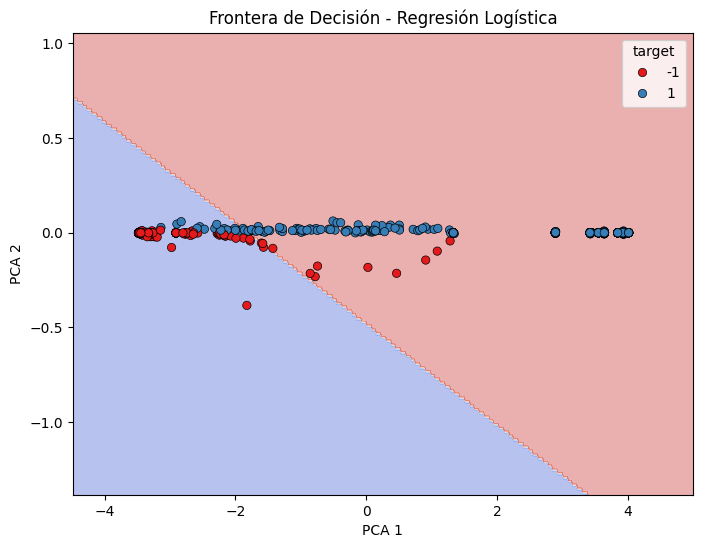

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_pca, y_train_pca)
y_pred_log = logreg.predict(X_test_pca)

print("📊 Regresión Logística\n")
print(classification_report(y_test_pca, y_pred_log))
sns.heatmap(confusion_matrix(y_test_pca, y_pred_log), annot=True, fmt="d")
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

plot_decision_boundary(logreg, X_test_pca, y_test_pca, "Frontera de Decisión - Regresión Logística")



🔹 Árbol
Precisión: 0.9940
Recall: 1.0000
F1-score: 0.9970

🔹 SVM
Precisión: 0.9702
Recall: 0.9760
F1-score: 0.9731

🔹 Reg. Logística
Precisión: 0.9778
Recall: 0.9681
F1-score: 0.9729


<ipython-input-12-a25b8f2811ca>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="F1", data=resultados_df, palette=colores)


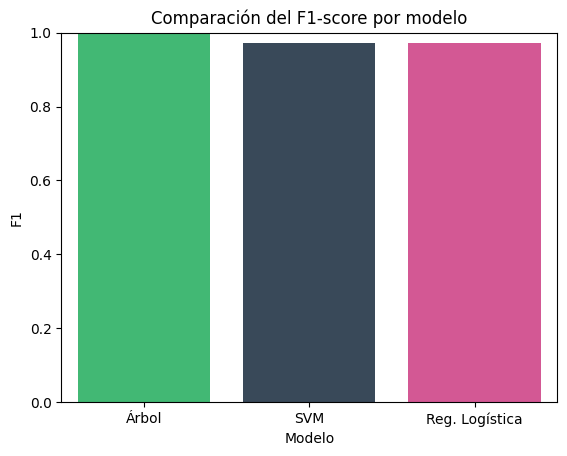

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular métricas para cada modelo
metrics = {
    "Árbol": {
        "Precisión": precision_score(y_test_pca, y_pred_tree),
        "Recall": recall_score(y_test_pca, y_pred_tree),
        "F1-score": f1_score(y_test_pca, y_pred_tree),
    },
    "SVM": {
        "Precisión": precision_score(y_test_pca, y_pred_svm),
        "Recall": recall_score(y_test_pca, y_pred_svm),
        "F1-score": f1_score(y_test_pca, y_pred_svm),
    },
    "Reg. Logística": {
        "Precisión": precision_score(y_test_pca, y_pred_log),
        "Recall": recall_score(y_test_pca, y_pred_log),
        "F1-score": f1_score(y_test_pca, y_pred_log),
    }
}

# Imprimir métricas en consola
for modelo, vals in metrics.items():
    print(f"\n🔹 {modelo}")
    for metrica, valor in vals.items():
        print(f"{metrica}: {valor:.4f}")

# Crear DataFrame para el gráfico
resultados_df = pd.DataFrame([
    {"Modelo": modelo, "F1": vals["F1-score"]}
    for modelo, vals in metrics.items()
])

# Colores personalizados: Árbol = verde, SVM = azul marino, Reg. Log = fucsia
colores = ["#2ecc71", "#34495e", "#e84393"]

# Graficar F1-score
sns.barplot(x="Modelo", y="F1", data=resultados_df, palette=colores)
plt.title("Comparación del F1-score por modelo")
plt.ylim(0, 1)
plt.show()

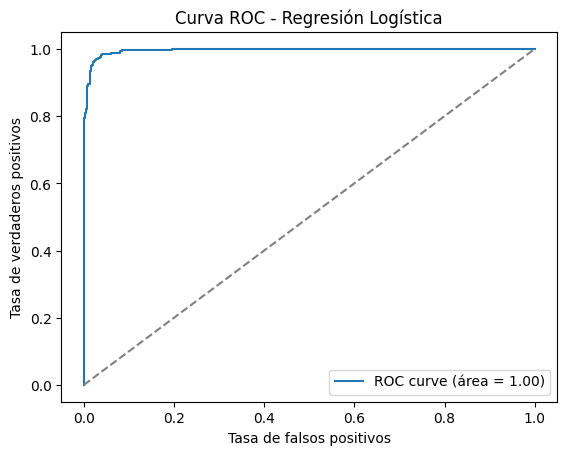

In [13]:
# ROC Curve (si es binaria)
# Mide la calidad del modelo respecto a falsos positivos/verdaderos positivos.
from sklearn.metrics import roc_curve, auc

y_scores = logreg.decision_function(X_test_pca)
fpr, tpr, _ = roc_curve(y_test_pca, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Distribución de F1-score por Modelo')

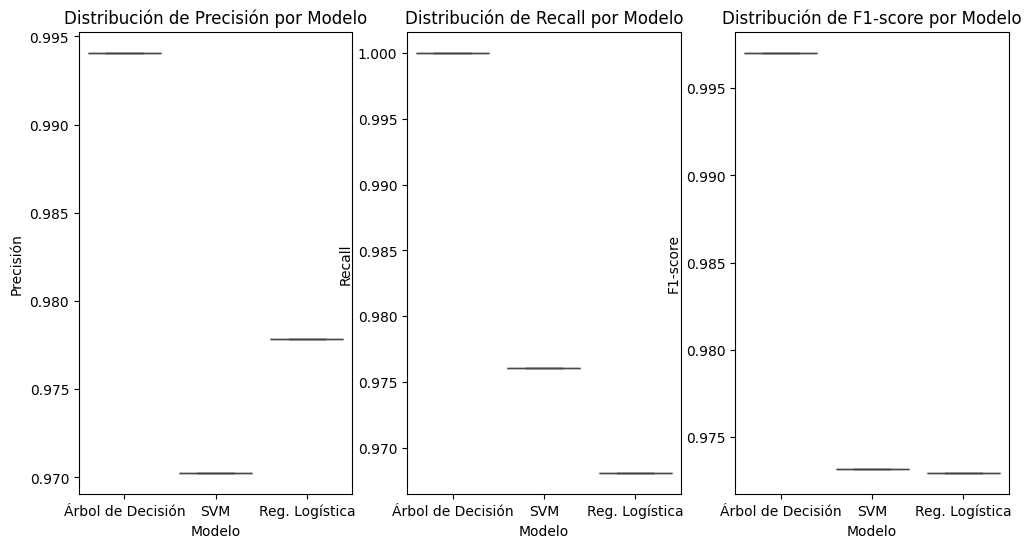

In [14]:
# Crear un DataFrame con los resultados de las métricas (Precisión, Recall, F1) para cada modelo
resultados_df = pd.DataFrame({
    "Modelo": ["Árbol de Decisión", "SVM", "Reg. Logística"],
    "Precisión": [
        precision_score(y_test_pca, y_pred_tree),
        precision_score(y_test_pca, y_pred_svm),
        precision_score(y_test_pca, y_pred_log)
    ],
    "Recall": [
        recall_score(y_test_pca, y_pred_tree),
        recall_score(y_test_pca, y_pred_svm),
        recall_score(y_test_pca, y_pred_log)
    ],
    "F1-score": [
        f1_score(y_test_pca, y_pred_tree),
        f1_score(y_test_pca, y_pred_svm),
        f1_score(y_test_pca, y_pred_log)
    ]
})

# Graficar los boxplots de precisión, recall y f1-score
plt.figure(figsize=(12, 6))

# Boxplot de Precisión
plt.subplot(1, 3, 1)
sns.boxplot(x="Modelo", y="Precisión", data=resultados_df, hue="Modelo", palette="Set1", legend=False)
plt.title("Distribución de Precisión por Modelo")

# Boxplot de Recall
plt.subplot(1, 3, 2)
sns.boxplot(x="Modelo", y="Recall", data=resultados_df, hue="Modelo", palette="Set1", legend=False)
plt.title("Distribución de Recall por Modelo")

# Boxplot de F1-score
plt.subplot(1, 3, 3)
sns.boxplot(x="Modelo", y="F1-score", data=resultados_df, hue="Modelo", palette="Set1", legend=False)
plt.title("Distribución de F1-score por Modelo")




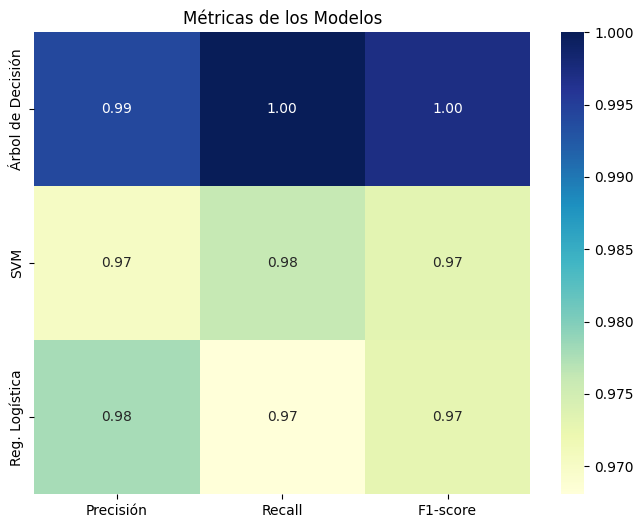

In [15]:
# Crear un DataFrame con todas las métricas
resultados_matriciales = pd.DataFrame({
    "Precisión": [
        precision_score(y_test_pca, y_pred_tree),
        precision_score(y_test_pca, y_pred_svm),
        precision_score(y_test_pca, y_pred_log)
    ],
    "Recall": [
        recall_score(y_test_pca, y_pred_tree),
        recall_score(y_test_pca, y_pred_svm),
        recall_score(y_test_pca, y_pred_log)
    ],
    "F1-score": [
        f1_score(y_test_pca, y_pred_tree),
        f1_score(y_test_pca, y_pred_svm),
        f1_score(y_test_pca, y_pred_log)
    ]
}, index=["Árbol de Decisión", "SVM", "Reg. Logística"])

# Graficar un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(resultados_matriciales, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Métricas de los Modelos")
plt.show()

In [16]:
# Crear un diccionario con los resultados de las métricas de cada modelo
resultados = {
    "Modelo": ["Árbol de Decisión", "SVM", "Reg. Logística"],
    "Precisión": [
        precision_score(y_test_pca, y_pred_tree),
        precision_score(y_test_pca, y_pred_svm),
        precision_score(y_test_pca, y_pred_log)
    ],
    "Recall": [
        recall_score(y_test_pca, y_pred_tree),
        recall_score(y_test_pca, y_pred_svm),
        recall_score(y_test_pca, y_pred_log)
    ],
    "F1-score": [
        f1_score(y_test_pca, y_pred_tree),
        f1_score(y_test_pca, y_pred_svm),
        f1_score(y_test_pca, y_pred_log)
    ]
}

# Convertir el diccionario a un DataFrame
tabla_resultados = pd.DataFrame(resultados)

# Imprimir la tabla
print(tabla_resultados)

              Modelo  Precisión    Recall  F1-score
0  Árbol de Decisión   0.994048  1.000000  0.997015
1                SVM   0.970238  0.976048  0.973134
2     Reg. Logística   0.977823  0.968064  0.972919
